In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [3]:
#Read the data in pandas
df_app= pd.read_excel("Used Cars.xlsx")
df_app.head()

,S.No.,Name,Location,Year,Kilometers_Driven (KM),Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (Rupees)
0,1,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000.0
1,2,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000.0
2,3,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000.0
3,4,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000.0
4,5,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1774000.0


In [4]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.No.                   6001 non-null   int64  
 1   Name                    6001 non-null   object 
 2   Location                6001 non-null   object 
 3   Year                    6001 non-null   int64  
 4   Kilometers_Driven (KM)  6001 non-null   int64  
 5   Fuel_Type               6001 non-null   object 
 6   Transmission            6001 non-null   object 
 7   Owner_Type              6001 non-null   object 
 8   Mileage (kmpl)          6001 non-null   float64
 9   Engine (CC)             6001 non-null   int64  
 10  Power (bhp)             6001 non-null   float64
 11  Seats                   6001 non-null   int64  
 12  Price (Rupees)          6001 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 609.6+ KB


In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
print(df_app.columns.tolist())

['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven (KM)', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage (kmpl)', 'Engine (CC)', 'Power (bhp)', 'Seats', 'Price (Rupees)']


In [7]:
pd.options.display.max_rows = None

<AxesSubplot:xlabel='Kilometers_Driven (KM)', ylabel='Count'>

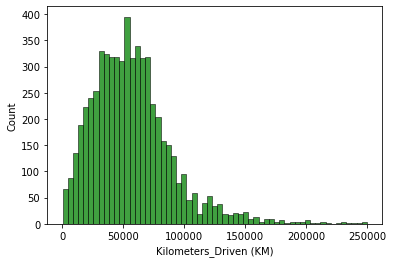

In [8]:
sns.histplot(data=df_app, x="Kilometers_Driven (KM)" , color = 'green')

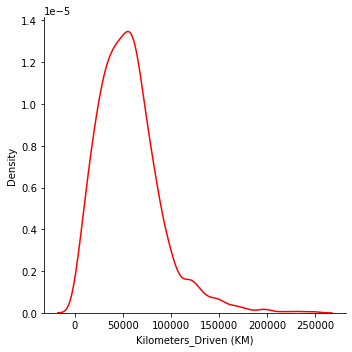

In [9]:
sns.displot(data=df_app, x="Kilometers_Driven (KM)", kind="kde" , color = 'red')

In [10]:
x = df_app[['Year','Kilometers_Driven (KM)','Mileage (kmpl)','Engine (CC)','Power (bhp)','Seats']]
y = df_app['Price (Rupees)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -185240530.96312344
Coefficients: 
 [ 9.17430862e+04 -2.40457501e+00  4.82245408e+03  4.12513549e+02
  1.21147244e+04 -9.74691202e+04]


C:\Users\dell-pc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         Price (Rupees)   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2051.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        12:35:38   Log-Likelihood:                -88748.
No. Observations:                6001   AIC:                         1.775e+05
Df Residuals:                    5994   BIC:                         1.776e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.85

In [11]:
df_app['Predicted values'] = predictions
df_app.head()

,S.No.,Name,Location,Year,Kilometers_Driven (KM),Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price (Rupees),Predicted values
0,1,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,175000.00,-252844.60
1,2,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,1250000.00,1312186.81
2,3,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,450000.00,313807.73
3,4,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,600000.00,145358.75
4,5,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,1774000.00,1444042.98


In [12]:
#df_app.to_excel(r'D:\\02 University of Bradford Syllabus\\SEM 2\\Assignments Dec 2022\\Data ANalytics\\Hypothesis Testing data Analysis\\mlr-predicted.xlsx', index=False)

In [13]:
sns.set(font_scale=1.5)

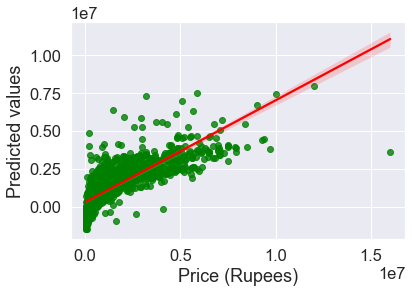

In [14]:
sns.regplot(x="Price (Rupees)", y="Predicted values",data=df_app , scatter_kws={"color": "green"}, line_kws={"color": "red"});

In [15]:
pd.options.display.max_rows = 1000

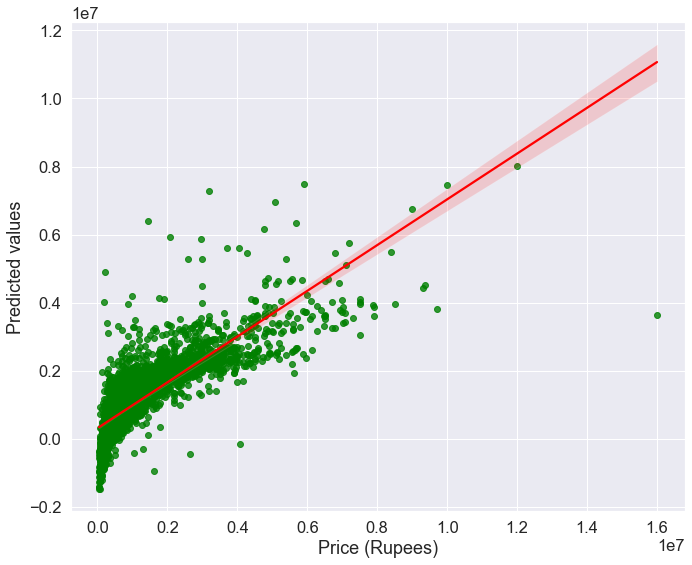

In [16]:
k = sns.regplot(x="Price (Rupees)", y="Predicted values",data=df_app , scatter_kws={"color": "green"}, line_kws={"color": "red"})
k.figure.set_size_inches(11, 9)